## A. Data Preparation (1 points)

Please identify or prepare a text classification dataset. You can either: 
+ Find and download an **existing dataset**, OR
+ **Create a dataset** on your own

Some of the websites to search for a dataset: 
+ https://www.kaggle.com/datasets
+ https://archive.ics.uci.edu/ml/datasets.php
+ https://vincentarelbundock.github.io/Rdatasets/datasets.html

Specific **requirements** of your dataset: 
1. [ ] It has to have **text** data, e.g. abstracts, news reports. 
2. [ ] It has to have a **class** attribute, e.g. with at least **two** categories or labels.
3. [ ] It has to have at least: 
    + If it is an **existing dataset, 300+** data instances total and **100+** in each class, **OR**
    + If you **create** the dataset, **30+** data instances total and **10+** in each class. 
4. [ ] Please **avoid** any dataset already used in **existing** exercises or assignments in this class. 

Please do: 
+ [ ] Include a **link** to your data or **submit** your data. 
+ [ ] Include a **brief description** of your data, attributes, and instances. 
+ [ ] Discuss the classification **task** on the data and **objectives**. 


## brief description of Data:

The data consists of a tweet which is text data which has two classes[target] whether it is a real disaster or not disaster. Along with the text we have location and keyword.

data attributes used for classification:

Text: it contains the text of tweet.<br>
Target: The target attribute consists of two classes disaster/ not disaster.

<b>Classification task:</b>

predicting whether a given tweet is about a real disaster or not a disaster. we have applied various classification/linear techniques and probability measures for the determining the classification task.


In [207]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML, display

plt.rcdefaults()

In [208]:
df = pd.read_csv("tweet_disaster_not_disaster.csv")
df = df[['text','target']]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [209]:
df['target'][df['target'] == 1 ] = 'disaster'
df['target'][df['target'] == 0 ] = 'not_disaster'
df[['text','target']].head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,disaster
1,Forest fire near La Ronge Sask. Canada,disaster
2,All residents asked to 'shelter in place' are ...,disaster
3,"13,000 people receive #wildfires evacuation or...",disaster
4,Just got sent this photo from Ruby #Alaska as ...,disaster


## B. Probabilities and Zipf (3 points)

### B.1. Class Distributions and Probabilities (0.5 point)

Find out the number of instances in each class $c$ and compute it's probability $p(c)$. Compile a table like this (example): 

|   Class $c$    |  Instances $n_c$  |   Probability $p(c)$     |
|----------------|-------------------|------------------------   |
| disaster           |    3271            | $\frac{3271}{7613} = 0.4296$  |
| not_disaster          |    4342           | $\frac{4342}{7613} = 0.5703$  |

In [210]:
len(df['target'])

7613

In [211]:
print("number of Classes:",df['target'].unique())
print(' ')
print("number of instances of each class:", df['target'].value_counts())
print(' ')
print("probability of class disaster is:", (len(df[df['target'] == 'disaster'])/ len(df['target'])))
print(' ')
print("probability of class not_disaster is:", (len(df[df['target'] == 'not_disaster'])/ len(df['target'])))

number of Classes: ['disaster' 'not_disaster']
 
number of instances of each class: not_disaster    4342
disaster        3271
Name: target, dtype: int64
 
probability of class disaster is: 0.4296597924602653
 
probability of class not_disaster is: 0.5703402075397347


### B.2. Term Probabilities and Zipf's Law (2.5 points)

Conduct analysis in the following steps to obtain the term probability pattern in your text data. You can follow the example in [Probability and Linearity in Data](../demo/data_prob_linear.html) to use ```CountVectorizer``` from ```sklearn.feature_extraction.text```. 

#### B.2.1. Rank, Frequency, and Probability

Rank terms by frequency and show the top five with probabilities (example): 

|      |t       |$k_t$ |$f_t$| $p_t$ |
|------|--------|------|-----|-------|
|0     |co     |1     |4740 | 0.040179  |
|1     |http     |2     |4309 | 0.036526  |
|2     |the     |3     |3277 | 0.027778  |
|3     |in     |4     |1986  |  0.016835 |
|4     |to      |5     |1949  | 0.016521  |


In [212]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a count vectorizer
vect = CountVectorizer(analyzer="word")
# obtain vocabulary dictionary and return doc-term matrix
X = vect.fit_transform(df.text) 
# get the identified terms
terms = vect.get_feature_names()
# sum terms' frequencies in the entire collection
freqs = X.toarray().sum(axis=0)
terms = np.array(terms)
freqs = np.array(freqs)

# organize the tersm and frequencies in t and f columns
tfs = pd.DataFrame({'t':terms, 'f':freqs}, columns=['t','f'])

In [213]:
tfs = tfs.sort_values(by=['f'], ascending=False)
tfs = tfs.reset_index(drop=True)
tfs.head()

,t,f
0,co,4740
1,http,4309
2,the,3277
3,in,1986
4,to,1949


In [214]:
tfs['k'] = tfs.index + 1
ttf = tfs['f'].sum()
tfs['p'] = tfs['f'] / ttf
tfs[['t','k','f','p']].head()

,t,k,f,p
0,co,1,4740,0.040179
1,http,2,4309,0.036526
2,the,3,3277,0.027778
3,in,4,1986,0.016835
4,to,5,1949,0.016521


#### B.2.2. Probability vs. Rank Plot

Produce a probability $p_t$ vs. $k_t$ plot on **log-log** coordinates. 

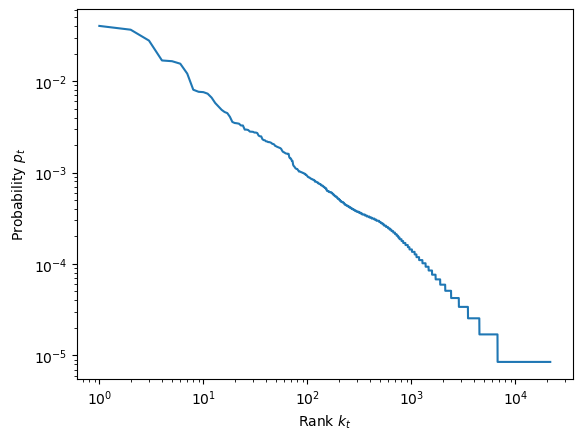

In [215]:
plt.loglog(tfs['k'], tfs['p'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.show()

#### B.2.3. Regression line 

Use linear regression to fit the $log(p_t) \sim log(k_t)$ relation: 
1. Identify the **coefficient** value from the regression, e.g. a value like $-1.2$ means $p_t \propto \frac{1}{k_t^{1.2}}$. 
2. Plot the regression line on the $p_t$ vs. $k_t$ plot. 
3. Do your data follow Zipf's law? Discuss the visual pattern, the fitted coefficient, and the regression line. 

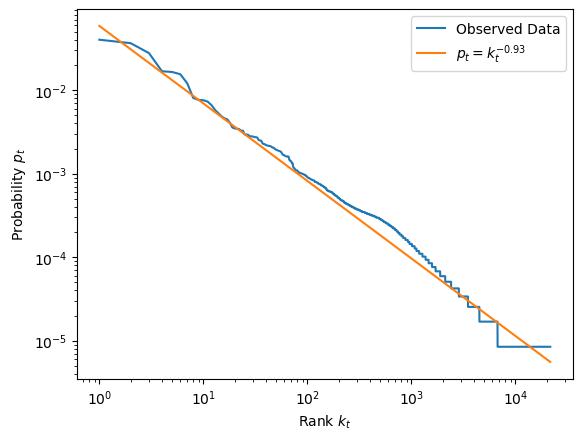

In [216]:
from sklearn.linear_model import LinearRegression

# log transformation of k and p values
x = tfs['k'].values.reshape(-1,1)
xlog = np.log(x)
y = tfs['p'].values.reshape(-1,1)
ylog = np.log(y)

# perform linear regression on log values
lm = LinearRegression()
lm.fit(xlog,ylog)
yplog = lm.predict(xlog)

# plot the fitted (predicted) line 
# along with actual k_t and p_t data
plt.loglog(tfs['k'], tfs['p'], label="Observed Data")
plt.loglog(x, np.exp(yplog), 
           label="$p_t = k_t^{" + "{:.2f}".format(lm.coef_[0][0]) + "}$")
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.legend()
plt.show()

<b>coefficient value:</b><br>
The coefficient value form the regression is obtained as -0.93 which is very close to -1. the coefficient value is for the above graph is represented as below.

\begin{eqnarray} 
    p_t & = & k_t^{-0.93} \\
    & = & \frac{1}{k_t^{0.93}}
\end{eqnarray}

$p_t = \frac{1}{k_t}$ as the Zipf's law suggests (as per zipf's law the coefficient should be exactly -1).


<b>Zipf's law:</b><br>
Zipf's law, states that the probability of an observation is inversely proportional to its rank, has been observed in many domains. Zipf’s law states that when regressing the log(rank) on the log(probability), the coefficient is -1. In our case it is -0.93 which shows that almost approximately nearer to -1 so it shows linear relationship between the log(Rank) and the log(probability).

<b>visual pattern:</b><br>
The above visual representation describes about the log-log coordinate relationship between probability of the term(y-axis) and rank of the term(x-axis). First, it is approximately linear on a log-log plot, meaning that the probability disctribution of the word with respective to the rank of the word frequency is approximately almost a linear.

<b>Fitted coefficient and Regression line:</b><br>
the coefficient value for the above log-log graph is -0.93. The word probabilities against the rank of the words follows a inverse linear relation and are almost similarly aligned aong the regression line with slight disturbances.



## C. Text Vectorization (2 points)

### C.1. Training and Test Data

Split your data into $80\%$ training and $20\%$ test data. 

In [217]:
# generate random true (80% chance) or false values
train_index = np.random.rand(len(df)) < 0.8
# use the above list to take the training (true values)
train = df[train_index]
# the opposite (rest) is for testing
test = df[~train_index]

In [154]:
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,disaster
2,All residents asked to 'shelter in place' are ...,disaster
3,"13,000 people receive #wildfires evacuation or...",disaster
4,Just got sent this photo from Ruby #Alaska as ...,disaster
5,#RockyFire Update => California Hwy. 20 closed...,disaster


In [218]:
# get the total number of instances
n = train.shape[0]
# get the total number of hams
counts = train.groupby("target")["target"].value_counts()
disaster = counts[0]
# compute probability
p_disaster = disaster / n
print("p(disaster) = {:.3f}".format(p_disaster))

p(disaster) = 0.432


In [156]:
# get the total number of spams
not_disaster = counts[1]
# compute probability
p_not_disaster = not_disaster / n
print("p(not_disaster) = {:.3f}".format(p_not_disaster))

p(not_disaster) = 0.573



### C.2. Text Vectorization

Use the ```CountVectorizer``` to: 
1. [ ] Vectorize (fit) your **training** data, based on the ```text``` field. 
2. [ ] Your vectorizer should now have a set of **features** (words) from the training data 
3. [ ] Transform your **test** data (text field), with the same vectorizer. 


In [219]:
vect = CountVectorizer(analyzer="word")
X_train = vect.fit_transform(train.text)

In [220]:
X_test = vect.transform(test.text)

In [221]:
disaster_index = train['target']=='disaster'
disaster = train[disaster_index]
not_disaster = train[~disaster_index]
X_disaster = vect.transform(disaster.text)
X_not_disaster = vect.transform(not_disaster.text)
X_disaster.shape

(2640, 18539)

### C.3. Terms and Conditional Probabilities

**Think** about two terms (words): 
1. [ ] One term (word) $t_1$ that is relevant to one class $c_1$, e.g. ```prize``` for a **spam** class for spam classification. 
2. [ ] A second term (word) $t_2$ that is relevant to another class $c_2$. 

Identify their conditional probabilities: 

\begin{eqnarray}
p(calamity|disaster) & = & 0.0000710 \\
p(calamity|not disaster) & = & 0.0000191 \\
p(embrace|disaster) & = & 0.0000704 \\
p(embrace|not dsaster) & = & 0.0000237\\
\end{eqnarray}

Discuss and explain: 
1. [ ] What do these probabilities mean? 
2. [ ] Are the above probability values reasonable (sensible)? Why or why not? 
3. [ ] Do you think they will be helpful in the classification task?

In [222]:
terms = vect.get_feature_names()
t1 = "calamity"
i = terms.index(t1)
print("The {:d}th term is: {:s}".format(i, t1))

The 3226th term is: calamity


In [223]:
disasterf = X_disaster.toarray().sum(axis=0)
disasterttf = disasterf.sum()
f = disasterf[i]
p = f / disasterttf
ps = (f+1)/(disasterttf+2)
print("p({:s}|disaster) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

p(calamity|disaster) = 0.0000700, smoothed to 0.0000933


In [224]:
not_disasterf = X_not_disaster.toarray().sum(axis=0)
not_disasterttf = not_disasterf.sum()
f = not_disasterf[i]
p = f / not_disasterttf
ps = (f+1)/(not_disasterttf+2)
print("p({:s}|not_disaster) = {:.7f}, smoothed to {:.7f}".format(t1, p, ps))

p(calamity|not_disaster) = 0.0000000, smoothed to 0.0000193


In [169]:
terms = vect.get_feature_names()
t2 = "embrace"
i = terms.index(t2)
print("The {:d}th term is: {:s}".format(i, t2))

The 5682th term is: embrace


In [225]:
disasterf = X_disaster.toarray().sum(axis=0)
disasterttf = disasterf.sum()
f = disasterf[i]
p = f / disasterttf
ps = (f+1)/(disasterttf+2)
print("p({:s}|disaster) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(embrace|disaster) = 0.0000700, smoothed to 0.0000933


In [226]:
not_disasterf = X_not_disaster.toarray().sum(axis=0)
not_disasterttf = not_disasterf.sum()
f = not_disasterf[i]
p = f / not_disasterttf
ps = (f+1)/(not_disasterttf+2)
print("p({:s}|not_disaster) = {:.7f}, smoothed to {:.7f}".format(t2, p, ps))

p(embrace|not_disaster) = 0.0000000, smoothed to 0.0000193


### Terms and Conditional Probabilities

<b>Class1 (disaster): accident</b> <br>
p(calamity|disaster) = 0.0000473 and smoothed value: 0.0000710<br>
p(calamity|not disaster) = 0.0000000 and smoothed value: 0.0000191 <br>

<b>Class2 (not_disaster): bleeding</b> <br>
p(embrace|disaster) = 0.0000000 and smoothed value: 0.0000237<br>
p(embrace|not_dsaster) = 0.0000191 and smoothed value: 0.0000382</font><br>

##### 1. What do these probabilities mean? 
The above terms shows that the conditional probabilities with respect to the class1 and class2. if we consider one term belongs to the particular class, it shows the likelihood of happening the event with respect to the class. for the given problem we have two different classes with two different terms (one for each class) shows the likelihood of happening the event with respect to their own classes. 

##### 2. Are the above probability values reasonable (sensible)? Why or why not?

For the above given problem the probabilites are sensible and with respect to each class are given as:<br> for the term accident which belogs to disaster(class1) is given as <b>(p(calamity|disaster) = 0.0000473 and smoothed value: 0.0000710) </b> and term accident with repect to not_disaster(class2) is given as <b>p(calamity|not disaster) = 0.0000000 and smoothed value: 0.0000191</b>. which shows the occurence of the term with class1 is 0.0071% and class2 is 0.0019%.

for the term bleeding which belogs to not_disaster(class2) is given as <b>(p(embrace|disaster) = 0.0000000 and smoothed value: 0.0000237) </b> and term accident with repect to not_disaster(class2) is given as <b>p(embrace|not_dsaster) = 0.0000191 and smoothed value: 0.0000382</b>. which shows the occurence of the term with class is 0.0023% and class2 is 0.0382%.

##### 3. Do you think they will be helpful in the classification task?

By looking at the probabilities for each term with respect to class, they help determine the classification task. 


## D. Classification (5 points)

### D.1. Probabilistic Naive Bayes Model (2 points)

Pick one of the Naive Bayes models we discussed: ```BernoulliNB``` **OR** ```MultinomialNB```, and conduct the following experiments: 

1. [ ] Pick an **alpha** parameter, build and train (fit) the model using the $80\%$ training data. 
2. [ ] Test (predict) the model on the $20\%$ test data. 
3. [ ] Evaluate, show the **confusion matrix**. 
4. [ ] Discuss, for your task and objectives, **which number(s)** in the confusion matrix is most important, that you wish to minimize or maximize? Why? 
5. [ ] Compute **accuracy**, **kappa**, and a **3rd metric** (do some research in ```sklearn.metrics```) that best evaluates evaluate your objective in the above **\#4** bullet point. 
6. [ ] Change **alpha**, train, test, and evaluate again. 

|  Model                                 |  Accuracy   |  Kappa     |  Recall  |
|---------------------------------------- |-------------|------------|--------------|
| Bernoulli Naive Bayes $\alpha_1$ = 0.01 | 0.7894      |    0.5655  |  0.7932      |
| Bernoulli Naive Bayes $\alpha_2$ = 1.0 |  0.7981      |    0.5786  |  0.8153      |


#### With parameters alpha=0.01, binarize=0.0

In [227]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB(alpha=0.01, binarize=0.0)
bNB.fit(X_train, train.target)
v1p = bNB.predict(X_test)

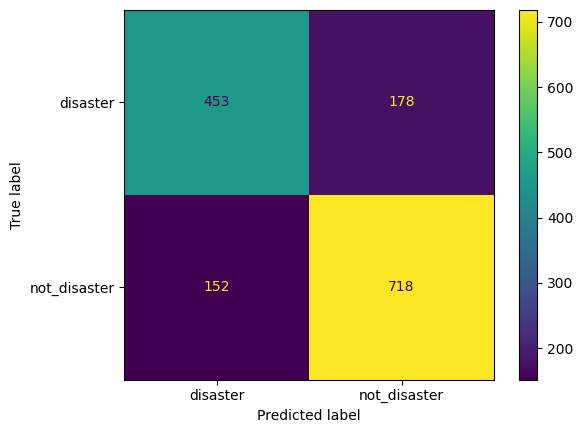

In [228]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(bNB, X_test, test.target, values_format='d'))

In [236]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, recall_score, precision_score
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7801
Kappa   : 0.5463
recall   : 0.7750
precision   : 0.7716


#### With parameters alpha=1.0, binarize=0.0

In [177]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB(alpha=1.0, binarize=0.0)
bNB.fit(X_train, train.target)
v1p = bNB.predict(X_test)

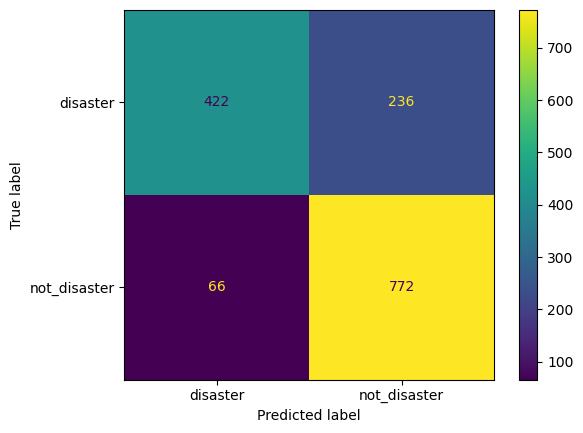

In [178]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(bNB, X_test, test.target, values_format='d'))

In [179]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, recall_score, precision_score
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7981
Kappa   : 0.5786
recall   : 0.8153
precision   : 0.7813


## Classification


1. Pick an alpha parameter, build and train (fit) the model using the  80%  training data. Test (predict) the model on the  20%  test data.<br>
I have chosen BernoulliNB with alpha parameter 0.01 and 1.0 which has the train (fit) data as 80% and test data as 20%.

2. Evaluate, show the confusion matrix.<br>
I have plotted the confusion matrix as per the model.

3. Discuss, for your task and objectives, which number(s) in the confusion matrix is most important, that you wish to minimize or maximize? Why?<br>
Based on the classification task is to predict whether the given tweet(text) falls under disaster class or not_disaster class. 
By looking at the confusion matrix true disaster and ture not_disaster values are important in the prediction of classification task. So it is important to concentrate on maximizing the ture class values. we focus on reducing (minimizing) the false disaster and false not_disaster values to improve the model performance.

4. Compute accuracy, kappa, and a 3rd metric (do some research in sklearn.metrics) that best evaluates evaluate your objective in the above #4 bullet point.Change alpha, train, test, and evaluate again.<br>
For the above model with training (80%) and testing (20%) we have computed the model accuracy, kappa, recall and precision values. model is evaluated for different alpha values (𝛼 = 0.01 and 1.0) and the scores are tabulated.

|  Model                                 |  Accuracy   |  Kappa     |  Recall  |
|---------------------------------------- |-------------|------------|--------------|
| Bernoulli Naive Bayes $\alpha_1$ = 0.01 | 0.7894      |    0.5655  |  0.7932      |
| Bernoulli Naive Bayes $\alpha_2$ = 1.0 |  0.7981      |    0.5786  |  0.8153      |



### D.2. Linear Model (2 points)

#### D.2.1. Linearity

Remember the two terms $t_1$ and $t_2$ for two classes $c_1$ and $c_2$ you picked earlier? 

Scatter plot the training data with: 

1. [ ] $t_1$ and $t_2$ as the $X$ and $Y$ axes. 
2. [ ] **Color code** data points based on their classes $c_1$ and $c_2$. 
    + You only need to plot data in the two classes. 
    + Make sure the two colors are distinguishable. 
3. [ ] Discuss whether: 
    + The two classes are (roughly) **separable** on the plot? 
    + The two classes are **linearly** separable on the plot? 
    + (Optional) It is possible they are linearly separable in a higher dimensional space with **all term features**? 

## Linearity

1. The two classes are (roughly) separable on the plot?
Looking at the data for terms t1 (calamity) and t2 (embrace) belonging to the two classes are roughly separable from each other and the plot is shown below. as per the below visualization we could see that the data poits are scattred and few points are slightly overlapping.

2. The two classes are linearly separable on the plot?
From the plot below we could see that the classes are linearly separable. and the few classes are overalpping with each other but they are very slight in numbers. 


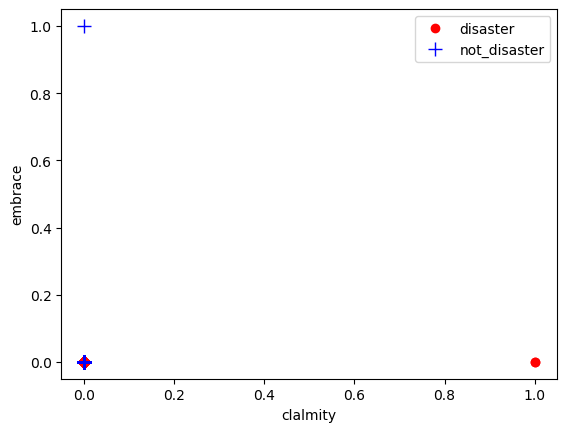

In [205]:
# for name, group in groups: 
plt.plot(X_disaster.toarray()[:,3208], X_disaster.toarray()[:,5682], linestyle='', marker='o', 
         color="red", ms=6, label="disaster")
plt.plot(X_not_disaster.toarray()[:,3208], X_not_disaster.toarray()[:,5682], linestyle='', marker='+', 
         color="blue", ms=10, label="not_disaster")
plt.xlabel("clalmity")
plt.ylabel("embrace")
plt.legend()
plt.show()

#### D.2.2. Linear Classification

1. [ ] Pick a linear classification model: ```Perceptron``` **OR** ```sklearn.svm.LinearSVC```. 
2. [ ] Conduct the same experiments outlined in section D.1 (for the Naive Bayes model). 
3. [ ] Make sure you research the model, pick a **parameter**, and use **two** different values for the parameter to train, test, and evaluate the model. 

|  Model                      |  Accuracy   |  Kappa     |  Recall     |
|---------------------------- |-------------|------------|--------------|
| LinearSVC, param1: C=1.0   |  0.7614      |   0.5105    |    0.7601   |
| LinearSVC, param2: C=0.1    |  0.7968     |   0.5790    |    0.8048   |


#### with parameters C=1.0, dual = True, loss = 'hinge'

In [191]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC(C=1.0, dual = True, loss = 'hinge')
LSVC.fit(X_train, train.target)
v1p = LSVC.predict(X_test)

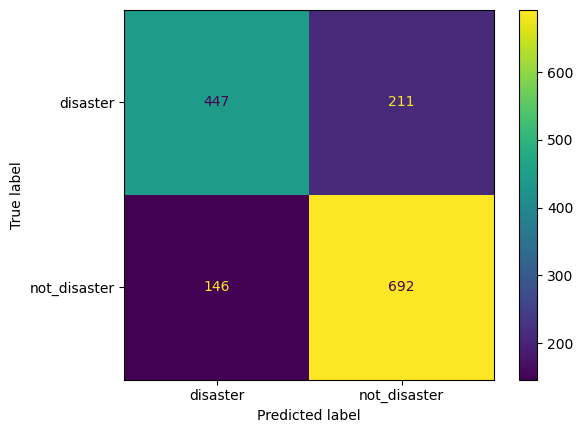

In [192]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(LSVC, X_test, test.target, values_format='d'))

In [193]:
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7614
Kappa   : 0.5105
recall   : 0.7601
precision   : 0.7526


#### with parameters C=0.1, dual = True, loss = 'hinge'

In [194]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC(C=0.1, dual = True, loss = 'hinge') #C = 1.0   SVM regularization parameter
LSVC.fit(X_train, train.target)
v1p = LSVC.predict(X_test)

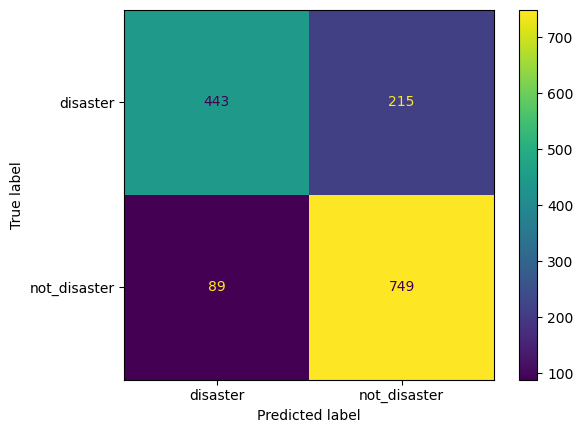

In [195]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(LSVC, X_test, test.target, values_format='d'))

In [196]:
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7968
Kappa   : 0.5790
recall   : 0.8048
precision   : 0.7835



### D.3 Non-linear Classification or Alternative (1 points)

Pick **one classification model** from the following: 
+ Non-linear Support Vector Machines (SVM) ```sklearn.svm.SVC```
+ Non-linear Multi-layer Perceptron: ```sklearn.neural_network.MLPClassifier```
+ Decision Tree: ```sklearn.tree.DecisionTreeClassifier```
+ Lazy Learning: ```sklearn.neighbors.KNeighborsClassifier```
+ Or any other classification model in ```sklearn```

Conduct the **same analysis as in D.2.2.**

|  Model                 |  Accuracy   |  Kappa     |  Recall  |
|------------------------|-------------|------------|--------------|
| DecisionTreeClassifier, param1 max_depth=20  |   0.7193   |  0.4036    |  0.7489     |
| DecisionTreeClassifier, param2 max_depth=40  |   0.7400   |   0.4546   |      0.7548 |

#### With parameters criterion="entropy", max_depth=20

In [199]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=20)
tree.fit(X_train, train.target)
v1p = tree.predict(X_test)

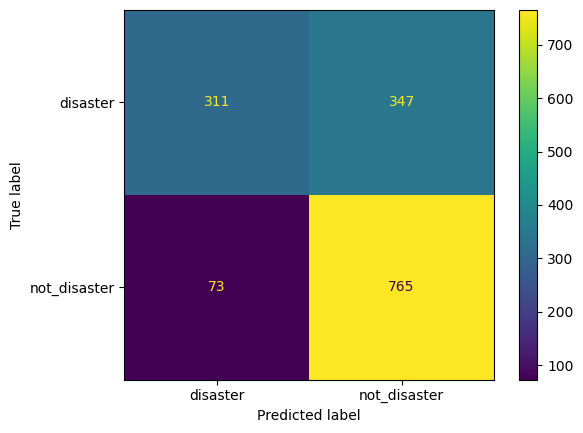

In [200]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(tree, X_test, test.target, values_format='d'))

In [201]:
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7193
Kappa   : 0.4036
recall   : 0.7489
precision   : 0.6928


#### With parameters criterion="entropy", max_depth=20

In [202]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=40)
tree.fit(X_train, train.target)
v1p = tree.predict(X_test)

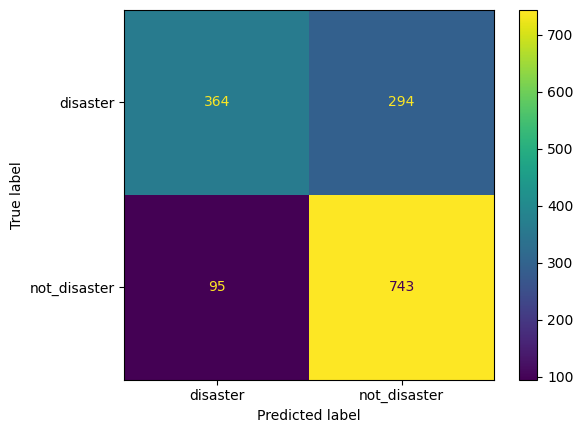

In [203]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.target)
display(plot_confusion_matrix(tree, X_test, test.target, values_format='d'))

In [204]:
acc = accuracy_score(v1p, test.target)
kappa = cohen_kappa_score(v1p, test.target)
recall_average = recall_score(v1p, test.target, average="macro")
precision_value = precision_score(v1p, test.target, average="macro")

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))
print("recall   : {:.4f}".format(recall_average))
print("precision   : {:.4f}".format(precision_value))

Accuracy: 0.7400
Kappa   : 0.4546
recall   : 0.7548
precision   : 0.7199


## Metrics 
<b>Accuracy</b> measures the fraction of the total sample that is correctly identified.<br>
<b>Kappa</b>  kappa values is defined as degree of agreement of nominal assessments made by multiple appraisers. The higher the kappa value, the stronger the degree of agreement.<br>
<b>Precision</b> measures that out of all the examples predicted as positive, how many are actually positive.<br>
<b>Recall</b> measures that out of all the actual positives, how many examples were correctly classified as positive by the model<br>



## E. Conclusion (1 point)

##### Compare the results in section D. 
|  Model                                 |  Accuracy   |  Kappa     |  Recall  |
|---------------------------------------- |-------------|------------|--------------|
| LinearSVC, param1: C=1.0   |  0.7614      |   0.5105    |    0.7601   |
| LinearSVC, param2: C=0.1    |  0.7968     |   0.5790    |    0.8048   |
| DecisionTreeClassifier, param1 max_depth=20  |   0.7193   |  0.4036    |  0.7489     |
| DecisionTreeClassifier, param2 max_depth=40  |   0.7400   |   0.4546   |      0.7548 |

For the linear / non-linear classification task the above results shows the models accuracy, kappa and Reall values tabulated as above. By comparing the results for the liner(LinearSVC) and non linear classification task (DecisionTreeClassifier) the linear classification model performes better than non-linear classification.

here, LinearSVC model with regularization parameter (C = 1.0 and C = 0.1) gives the accuracy 0.7614 and 0.7968 which is betther than DecisionTreeClassifier with max_depth (20 and 40) gives 0.7193 and 0.74.

##### Review your classification task and objectives. 

As per the data the classification task is to find the whether the given tweet (text) is diasater or not_disaster. Here, the objective is to model the data (text) with different classification / linear techniques to determine the classification task whether it is disaster or not_disaster.

##### Which model gives you the best result so far? Why? 

From the comparision of all the models above the classification model Bernoulli Naive Bayes with Laplace estimator (𝛼 = 1.0) gives the best accuracy (0.7981) results and performs better than all the models. from the confusion matrix it is clear then that with better estimator the false positive and false negative values are minimized which results in the better accuracy of the model.

So far out of all the models Bernoulli Naive Bayes gives the best results with classification task.

##### Thoughts on future work on the data? 

As a future work of on the data we can try different vectorization techniques for modelling. we can try different classifictaion, linear or non linear techniques for the classification task and the objectives of the data selected. we can extend the work to deep learning and conduct experiments which can give better results and compare the results with the other classification models.

For better performence of the data we can try feeding more data to the models and evaluate the classification tasks.
